In [430]:
from qiskit import *
import numpy as np
import math
from math import pi
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from IPython.display import display, Latex

NO_QUBITS = 4

QC = QuantumCircuit(NO_QUBITS)
#initial state
# QC.x(0)
QC.x(3)
# QC.x(1)
# QC.x(7)
QC.barrier()

def QFT(qc, no_of_Qubits):
    for q in range(0, no_of_Qubits):
        qc.h(q)
        for i in range(q+1, no_of_Qubits):
            qc.cp(pi/(2**(i-q)), i, q)
        qc.barrier()
    for q in range(no_of_Qubits//2):
        qc.swap(q, no_of_Qubits-q-1)
    qc.barrier()

def IQFT(qc, no_of_Qubits):
    for q in range(no_of_Qubits//2):
        qc.swap(q, no_of_Qubits-q-1)

    for q in range(no_of_Qubits-1, -1, -1):
        for i in range(no_of_Qubits-1, q, -1):
            qc.cp(-pi/(2**(i-q)), i, q)
        qc.h(q)
        qc.barrier()

state = Statevector(QC)
iteations = []
iteations.append(state.draw(output="latex"))

for i in range(10):
    QFT(QC, NO_QUBITS)
    state = Statevector(QC)
    iteations.append(state.draw(output="latex"))

for index, i in enumerate(iteations):
    print ('QFT iteration ', index)
    display(i)

QFT iteration  0


<IPython.core.display.Latex object>

QFT iteration  1


<IPython.core.display.Latex object>

QFT iteration  2


<IPython.core.display.Latex object>

QFT iteration  3


<IPython.core.display.Latex object>

QFT iteration  4


<IPython.core.display.Latex object>

QFT iteration  5


<IPython.core.display.Latex object>

QFT iteration  6


<IPython.core.display.Latex object>

QFT iteration  7


<IPython.core.display.Latex object>

QFT iteration  8


<IPython.core.display.Latex object>

QFT iteration  9


<IPython.core.display.Latex object>

QFT iteration  10


<IPython.core.display.Latex object>

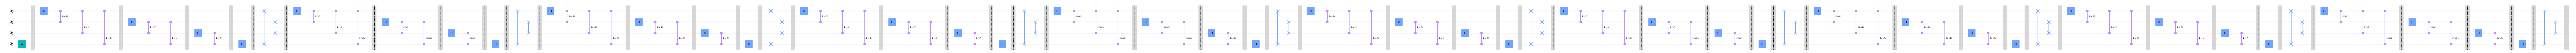

In [431]:
QC.draw(scale=0.75, output="mpl", fold=2000)

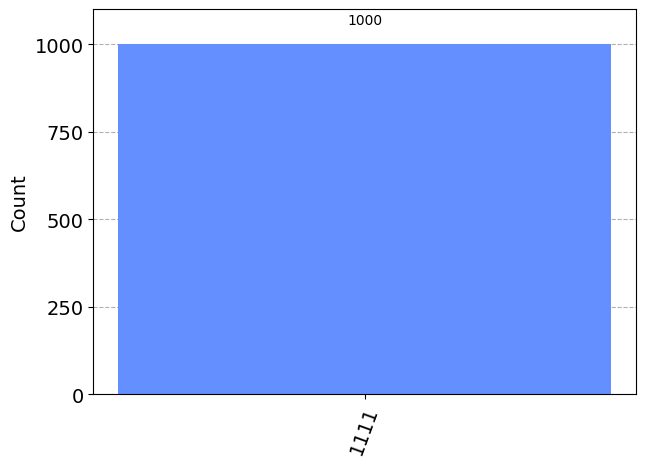

In [432]:
# execute the quantum circuit
QC.measure_all()
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = backend.run(transpile(QC, backend), shots=1000).result()
counts  = result.get_counts(QC)
plot_histogram(counts)

In [433]:
from scipy.fft import dct, idct, fft
x = fft(fft(np.array([3,4])))

print (z)

[14.+0.j -2.-0.j]
